<a href="https://colab.research.google.com/github/cvvarun12/Data-analytics-with-python/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install** **and** **import** **required** **libraries**

In [ ]:
# Install if not already available
!pip install pandas matplotlib statsmodels openpyxl

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

# **Load** **the** **dataset**

In [ ]:
# Upload the file manually if running in Colab
from google.colab import files
uploaded = files.upload()

# Load the Excel file
df = pd.read_excel(list(uploaded.keys())[0])  # assumes the uploaded file is the Excel dataset
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df.head()

Saving sample_sales_data.xlsx to sample_sales_data (2).xlsx


,Sales
Date,
2022-01-01,195
2022-01-02,210
2022-01-03,185
2022-01-04,205
2022-01-05,218


# **Visualise** **sales** **trends**

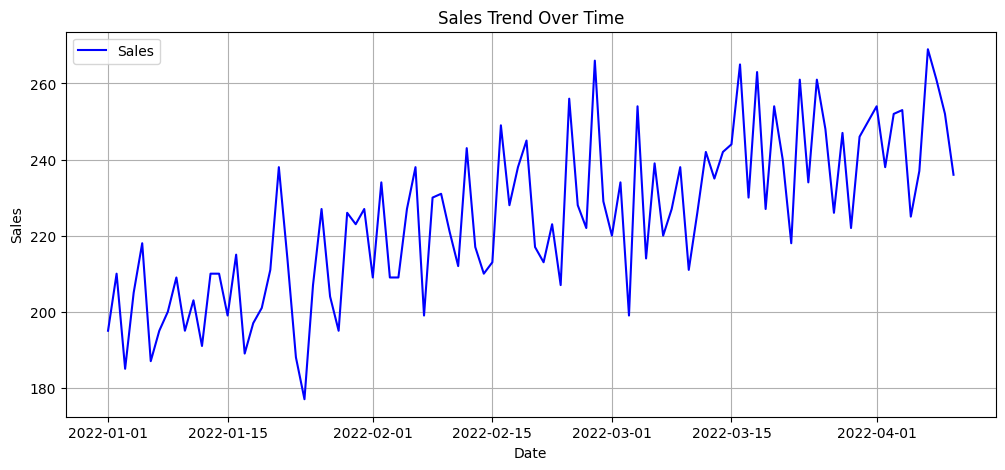

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Sales'], label='Sales', color='blue')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()

# **Split** **the** **data** **and** **fit** **the** **ARIMA** **model**

In [ ]:
# Splitting data: 80% train, 20% test
train_size = int(len(df) * 0.8)
train, test = df['Sales'][:train_size], df['Sales'][train_size:]

# Fit ARIMA model (you can tune p,d,q)
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

In [ ]:
# Install pmdarima if not already installed
!pip install pmdarima

from pmdarima import auto_arima

# Fit the best ARIMA model automatically
auto_model = auto_arima(train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
print(auto_model.summary())

# Refit on training data using the best parameters
model = ARIMA(train, order=auto_model.order)
model_fit = model.fit()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=718.216, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=691.276, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=716.267, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=681.092, Time=0.34 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=677.625, Time=0.16 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=675.333, Time=0.61 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=675.176, Time=0.20 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.51 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=674.675, Time=0.15 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=674.382, Time=0.49 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=676.331, Time=1.33 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=670.566, Time=0.22 se

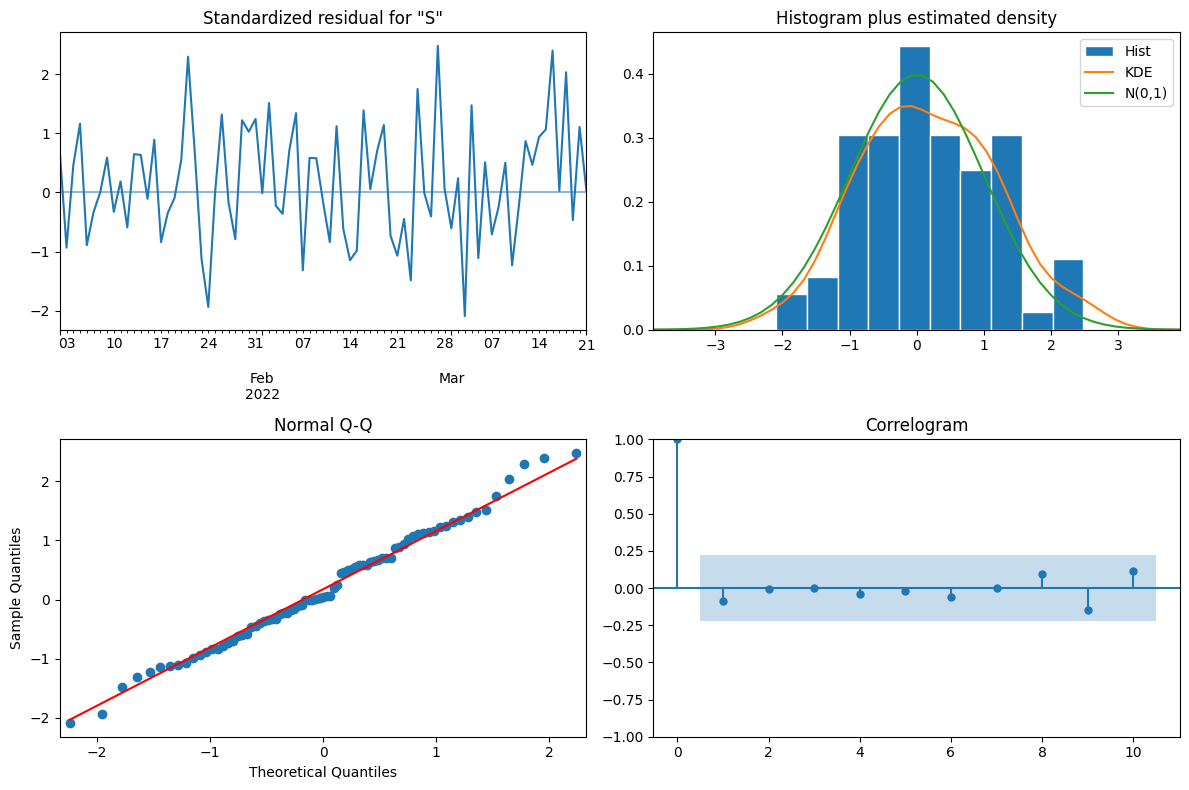

In [ ]:
# Plot diagnostics to evaluate residuals
model_fit.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

# **Evaluate** **the** **model**

In [ ]:
# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast) * 100

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Root Mean Squared Error (RMSE): 14.28
Mean Absolute Percentage Error (MAPE): 5.03%


# **Forecasting** **plot**

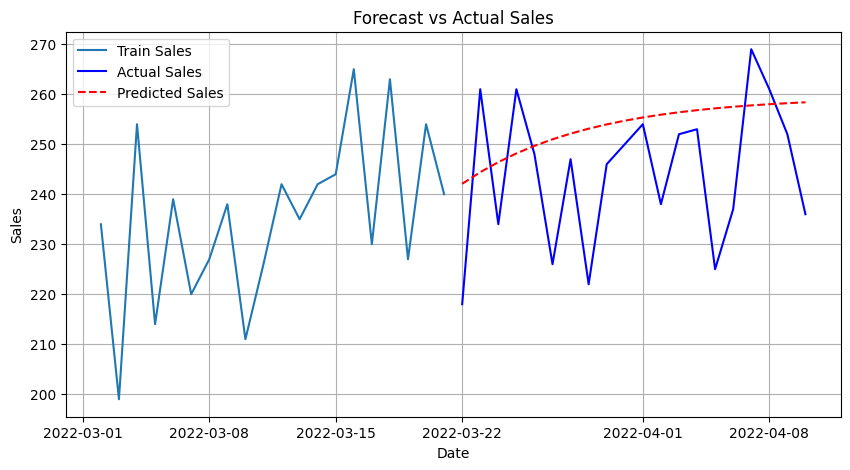

In [ ]:
# Forecasting
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index  # Align index

# Plot
plt.figure(figsize=(10, 5))
plt.plot(train.index[-20:], train[-20:], label='Train Sales')  # recent training data
plt.plot(test.index, test, label='Actual Sales', color='blue')
plt.plot(test.index, forecast, label='Predicted Sales', color='red', linestyle='--')
plt.title("Forecast vs Actual Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

# **Show** **forecasted** **sales** **values**

In [ ]:
# Create a DataFrame for comparison
results_df = pd.DataFrame({
    "Date": test.index,
    "Actual Sales": test.values,
    "Predicted Sales": forecast.values
})
results_df.set_index("Date", inplace=True)
results_df.head()

,Actual Sales,Predicted Sales
Date,,
2022-03-22,218,242.087371
2022-03-23,261,244.406429
2022-03-24,234,246.417534
2022-03-25,261,248.161580
2022-03-26,248,249.674029
